# Sprint 1: Data analysis and supervised learning

## Exploratory Data Analysis

Inlezen van het CSV bestand naar een DataFrame.

In [346]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

rows_to_read = None # Gewenst aantal rijen inlezen (None = allemaal)

complaints = pd.read_csv('data/complaints.csv', delimiter=',', nrows=rows_to_read)

rows, cols = complaints.shape

print(f'There are {rows} rows and {cols} columns')

There are 485701 rows and 18 columns


In [347]:
# Uitvoer inverteren voor betere leesbaarheid
complaints.head().T

,0,1,2,3,4
Date received,07/23/19,07/26/19,06/03/19,07/03/19,07/14/19
Product,"Credit reporting, credit repair services, or o...",Debt collection,Debt collection,Debt collection,"Credit reporting, credit repair services, or o..."
Sub-product,Credit reporting,I do not know,I do not know,Other debt,Credit reporting
Issue,Credit monitoring or identity theft protection...,False statements or representation,Attempts to collect debt not owed,Attempts to collect debt not owed,Improper use of your report
Sub-issue,Problem canceling credit monitoring or identif...,Attempted to collect wrong amount,Debt was paid,Debt was result of identity theft,Received unsolicited financial product or insu...
Consumer complaint narrative,I have complained many times that the credit r...,please review the current fraud account and al...,Called multiple times over the years for a deb...,I sent in a letter to the company to have them...,On XX/XX/19 I applied for a Debt Relief Produc...
Company public response,Company has responded to the consumer and the ...,Company believes it acted appropriately as aut...,None,None,None
Company,Experian Information Solutions Inc.,"Ideal Collection Services, Inc.","ONEMAIN FINANCIAL HOLDINGS, LLC.","Diversified Consultants, Inc.","ClearOne Advantage, LLC"
State,CA,FL,FL,VA,PA
ZIP code,926XX,333XX,327XX,232XX,191XX


Om de data beter te begrijpen maken we een nieuwe DataFrame met slechts 3 kolommen.
- Product
- Sub-product
- Consumer complaint narrative

Met deze DataFrame gaan we het aantal klachten voor elke categorie van producten en sub-producten bepalen.

In [348]:
# Nieuwe DataFrame aanmaken met 3 kolommen
df = complaints[['Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative']].copy()

# Kolommen een simpelere naam geven
df.columns = ['Product', 'Sub_Product', 'Issue', 'Sub_Issue', 'Narrative'] 

df.head().T

,0,1,2,3,4
Product,"Credit reporting, credit repair services, or o...",Debt collection,Debt collection,Debt collection,"Credit reporting, credit repair services, or o..."
Sub_Product,Credit reporting,I do not know,I do not know,Other debt,Credit reporting
Issue,Credit monitoring or identity theft protection...,False statements or representation,Attempts to collect debt not owed,Attempts to collect debt not owed,Improper use of your report
Sub_Issue,Problem canceling credit monitoring or identif...,Attempted to collect wrong amount,Debt was paid,Debt was result of identity theft,Received unsolicited financial product or insu...
Narrative,I have complained many times that the credit r...,please review the current fraud account and al...,Called multiple times over the years for a deb...,I sent in a letter to the company to have them...,On XX/XX/19 I applied for a Debt Relief Produc...


In [349]:
pd.DataFrame(complaints.Product.unique())

,0
0,"Credit reporting, credit repair services, or o..."
1,Debt collection
2,"Payday loan, title loan, or personal loan"
3,Mortgage
4,Credit card or prepaid card
5,Checking or savings account
6,Student loan
7,Vehicle loan or lease
8,"Money transfer, virtual currency, or money ser..."
9,Credit card


### Aantal klachten per categorie van producten

Er zijn meer dan 18 verschillende categoriën voor de producten. Sommige zijn echter heel erg gerelateerd aan elkaar. Daarom kan het nuttig zijn om sommige categorieën samen te nemen om de accuraatheid van het te bekomen model te verbeteren.
- 'Credit reporting, repair, or other'
    - 'Credit reporting, credit repair services, or other personal consumer reports'
    - 'Credit reporting'
- 'Credit card or prepaid card'
    - 'Credit card'
    - 'Prepaid card'
- 'Payday loan, title loan, or personal loan
    - 'Payday loan'
- 'Money transfer, virtual currency, or money service'
    - 'Money transfer' 
    - 'Virtual currency'

In [350]:
df.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)

In [351]:
pd.DataFrame(df.Product.unique())

,0
0,"Credit reporting, repair, or other"
1,Debt collection
2,"Payday loan, title loan, or personal loan"
3,Mortgage
4,Credit card or prepaid card
5,Checking or savings account
6,Student loan
7,Vehicle loan or lease
8,"Money transfer, virtual currency, or money ser..."
9,Bank account or service


Er blijven nu slechts 13 product categorieën over.

Om het mogelijk te maken om een model te ontwikkelen gaan we elke categorie die in tekstvorm in de dataset staat, gaan voorstellen als een getal. Hiervoor voegen we een nieuwe kolom toe met als naam 'Category_Id'.

In [352]:
df['Category_Id'] = df['Product'].factorize()[0]

# Dictionary aanmaken die de 'Category_Id - Product' combinaties bevat
categories = dict(df[['Category_Id', 'Product']].drop_duplicates().values)
categories

{0: 'Credit reporting, repair, or other',
 1: 'Debt collection',
 2: 'Payday loan, title loan, or personal loan',
 3: 'Mortgage',
 4: 'Credit card or prepaid card',
 5: 'Checking or savings account',
 6: 'Student loan',
 7: 'Vehicle loan or lease',
 8: 'Money transfer, virtual currency, or money service',
 9: 'Bank account or service',
 10: 'Consumer Loan',
 11: 'Money transfers',
 12: 'Other financial service'}

In [353]:
# Nieuwe DataFrame met de extra kolom weergeven
df.head()

,Product,Sub_Product,Issue,Sub_Issue,Narrative,Category_Id
0,"Credit reporting, repair, or other",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...,0
1,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...,1
2,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,Called multiple times over the years for a deb...,1
3,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I sent in a letter to the company to have them...,1
4,"Credit reporting, repair, or other",Credit reporting,Improper use of your report,Received unsolicited financial product or insu...,On XX/XX/19 I applied for a Debt Relief Produc...,0


Vervolgens gaan we het aantal producten per categorie bepalen en visualiseren in een barplot.

In [354]:
# Aantal products
product_counts = df.groupby('Product').Product.count()
product_counts.sort_values(ascending=False)

Product
Credit reporting, repair, or other                    173330
Debt collection                                       105765
Mortgage                                               61094
Credit card or prepaid card                            51770
Student loan                                           24930
Checking or savings account                            18784
Bank account or service                                14885
Consumer Loan                                           9473
Vehicle loan or lease                                   8079
Payday loan, title loan, or personal loan               8051
Money transfer, virtual currency, or money service      7751
Money transfers                                         1497
Other financial service                                  292
Name: Product, dtype: int64

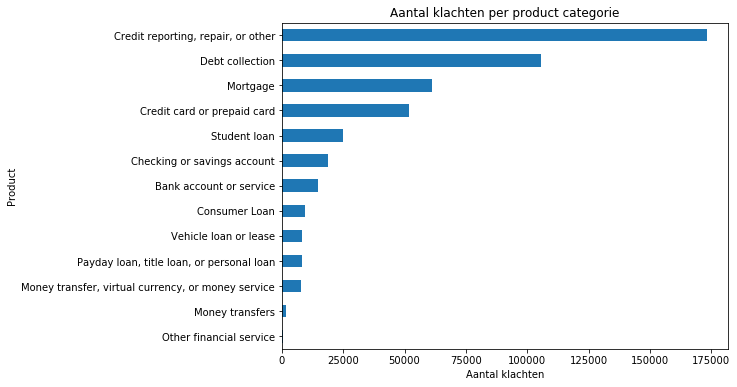

In [355]:
fig = plt.figure(figsize=(8,6))
product_counts.sort_values().plot.barh(ylim=0, title="Aantal klachten per product categorie")
plt.xlabel('Aantal klachten', fontsize = 10);

In [356]:
# Aantal sub-products
sub_product_counts = df.groupby('Sub_Product').Sub_Product.count()
sub_product_counts.sort_values(ascending=False)

Sub_Product
Credit reporting                              138534
None                                           52172
Checking account                               25745
General-purpose credit card or charge card     23961
I do not know                                  20639
                                               ...  
Credit repair                                     39
Traveler’s/Cashier’s checks                       22
Transit card                                      19
Electronic Benefit Transfer / EBT card             3
Student prepaid card                               3
Name: Sub_Product, Length: 76, dtype: int64

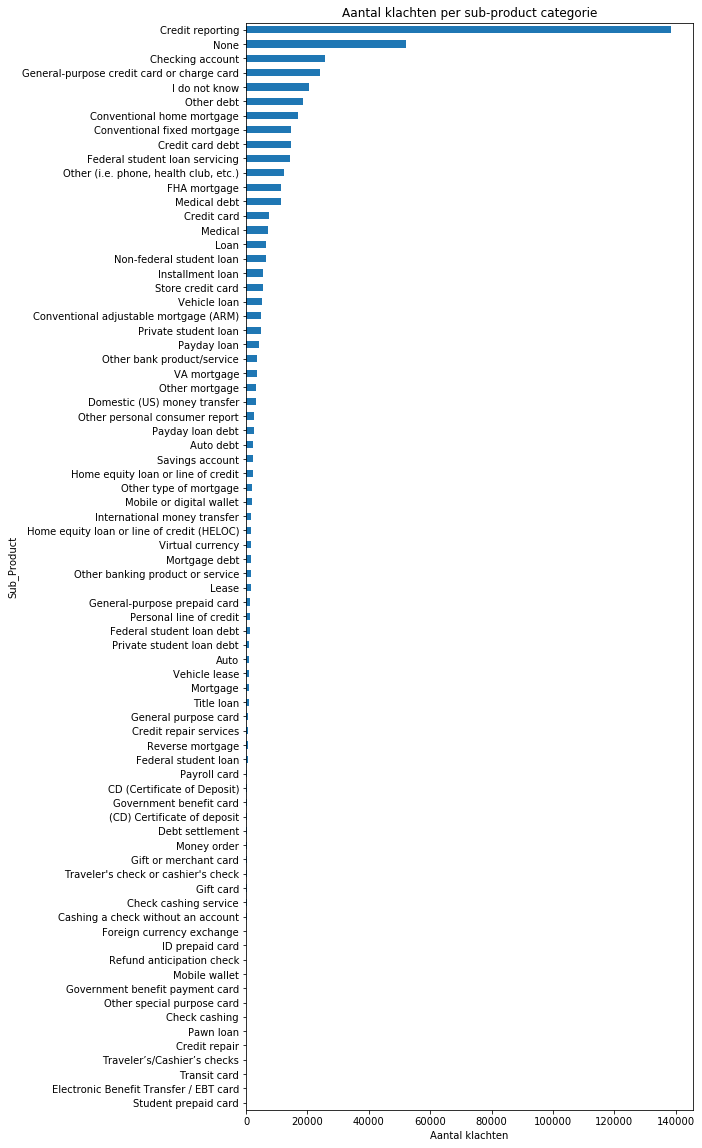

In [357]:
fig = plt.figure(figsize=(8,20))
sub_product_counts.sort_values().plot.barh(ylim=0, title="Aantal klachten per sub-product categorie")
plt.xlabel('Aantal klachten', fontsize = 10);

Om deze categorieën van producten en sub-producten beter te begrijpen, gaan we het verband tussen beiden gaan onderzoeken.

In [358]:
product_to_subproducts = df.groupby('Product').Sub_Product.unique()
product_to_subproducts

Product
Bank account or service                               [Other bank product/service, Checking account,...
Checking or savings account                           [Checking account, Savings account, Other bank...
Consumer Loan                                         [Vehicle loan, Installment loan, Vehicle lease...
Credit card or prepaid card                           [General-purpose credit card or charge card, S...
Credit reporting, repair, or other                    [Credit reporting, Credit repair services, Oth...
Debt collection                                       [I do not know, Other debt, Mortgage debt, Cre...
Money transfer, virtual currency, or money service    [Debt settlement, Mobile or digital wallet, Do...
Money transfers                                       [International money transfer, Domestic (US) m...
Mortgage                                              [Conventional home mortgage, FHA mortgage, Hom...
Other financial service                               [D

In [418]:
df2 = pd.DataFrame({'Count': df.groupby(['Sub_Product', 'Product']).size()})
df2.reset_index(inplace=True)  

df2

,Sub_Product,Product,Count
0,(CD) Certificate of deposit,Bank account or service,274
1,Auto,Debt collection,1064
2,Auto debt,Debt collection,2319
3,CD (Certificate of Deposit),Checking or savings account,338
4,Cashing a check without an account,Bank account or service,134
...,...,...,...
90,Traveler’s/Cashier’s checks,Other financial service,22
91,VA mortgage,Mortgage,3437
92,Vehicle lease,Consumer Loan,962
93,Vehicle loan,Consumer Loan,5141


### Issue en sub-issue distributies